In [83]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import pandas as pd

%matplotlib inline

RANDOM AGENT
TOTAL REWARD : 6447.395222306391
TIME TAKEN (ms) : 16.001


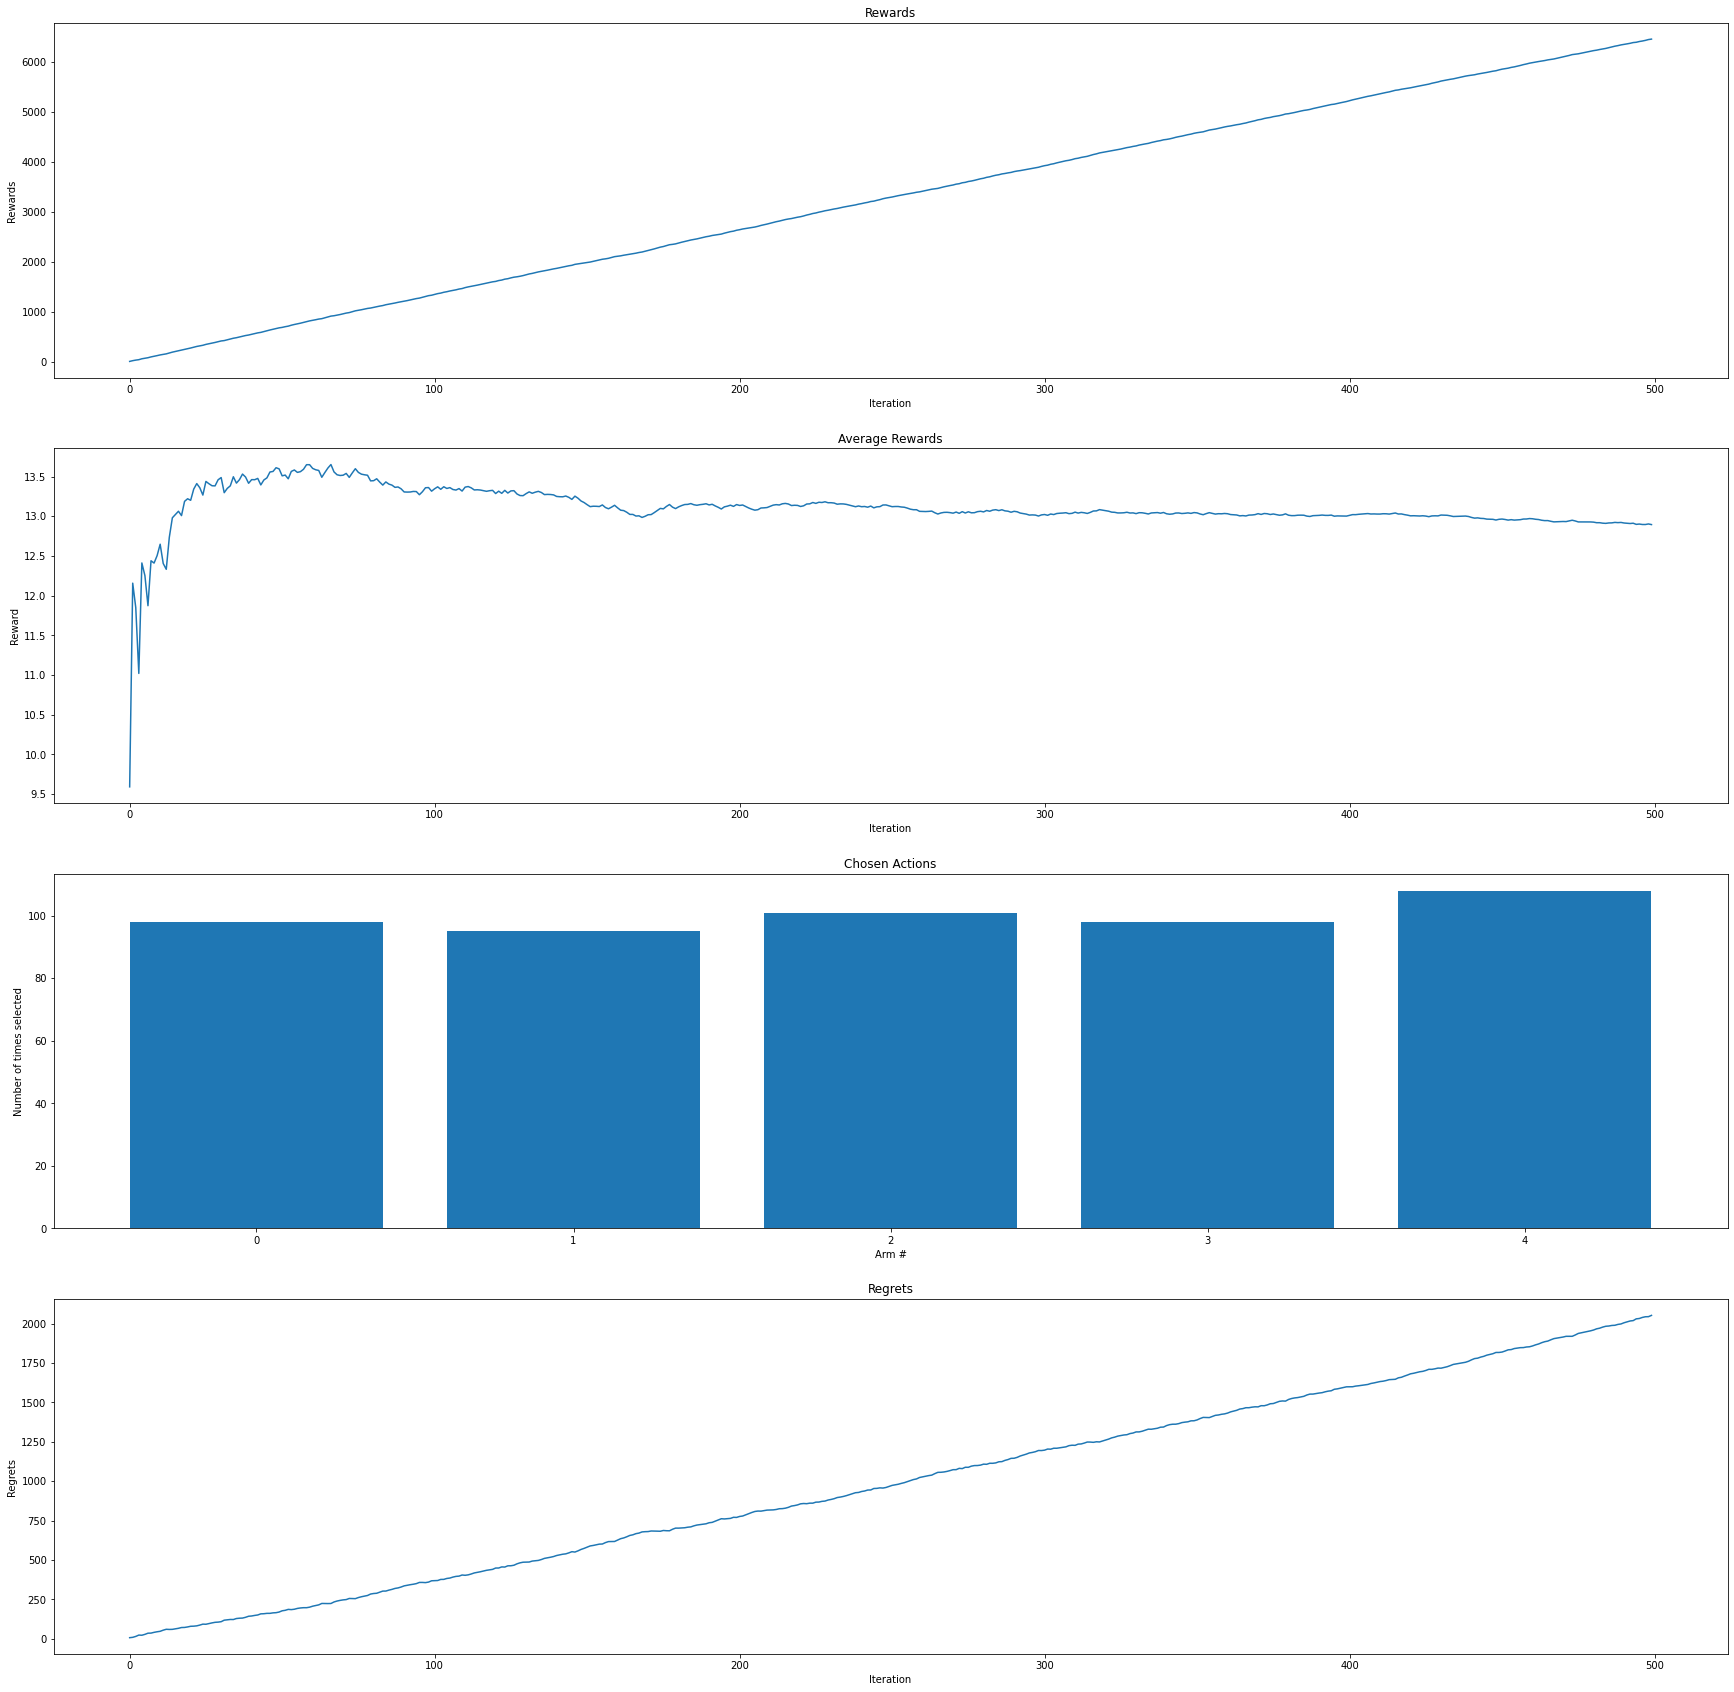

THOMPSON SAMPLING
TOTAL REWARD : 8483.081773906822
TIME TAKEN (ms) : 16.001


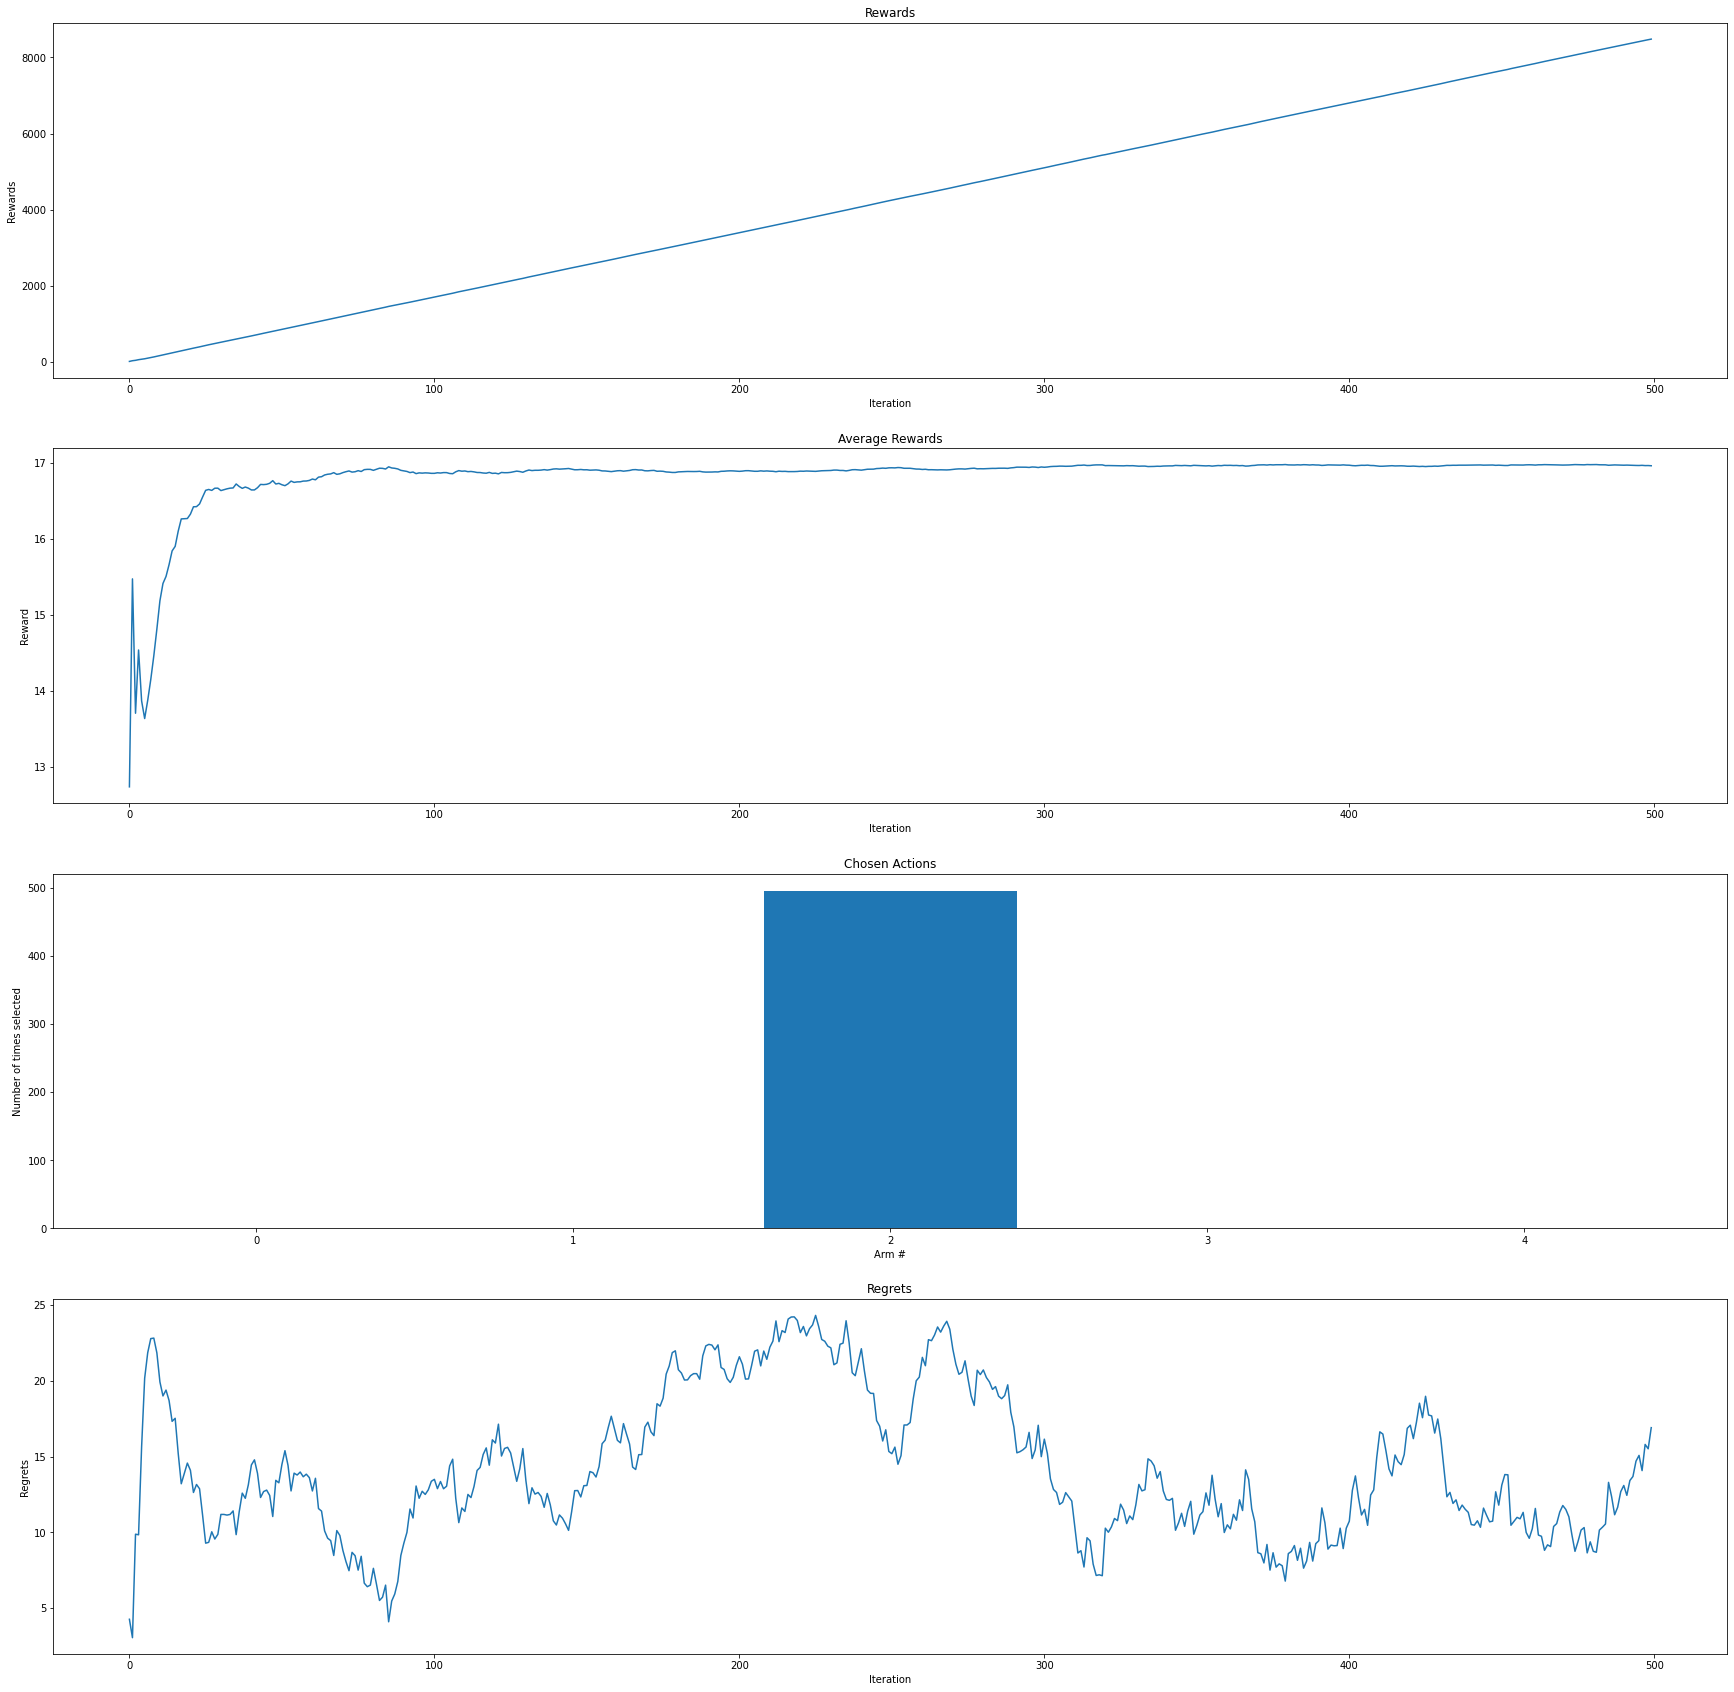

EPSILON GREEDY
TOTAL REWARD : 8039.475289421682
TIME TAKEN (ms) : 10.998000000000001


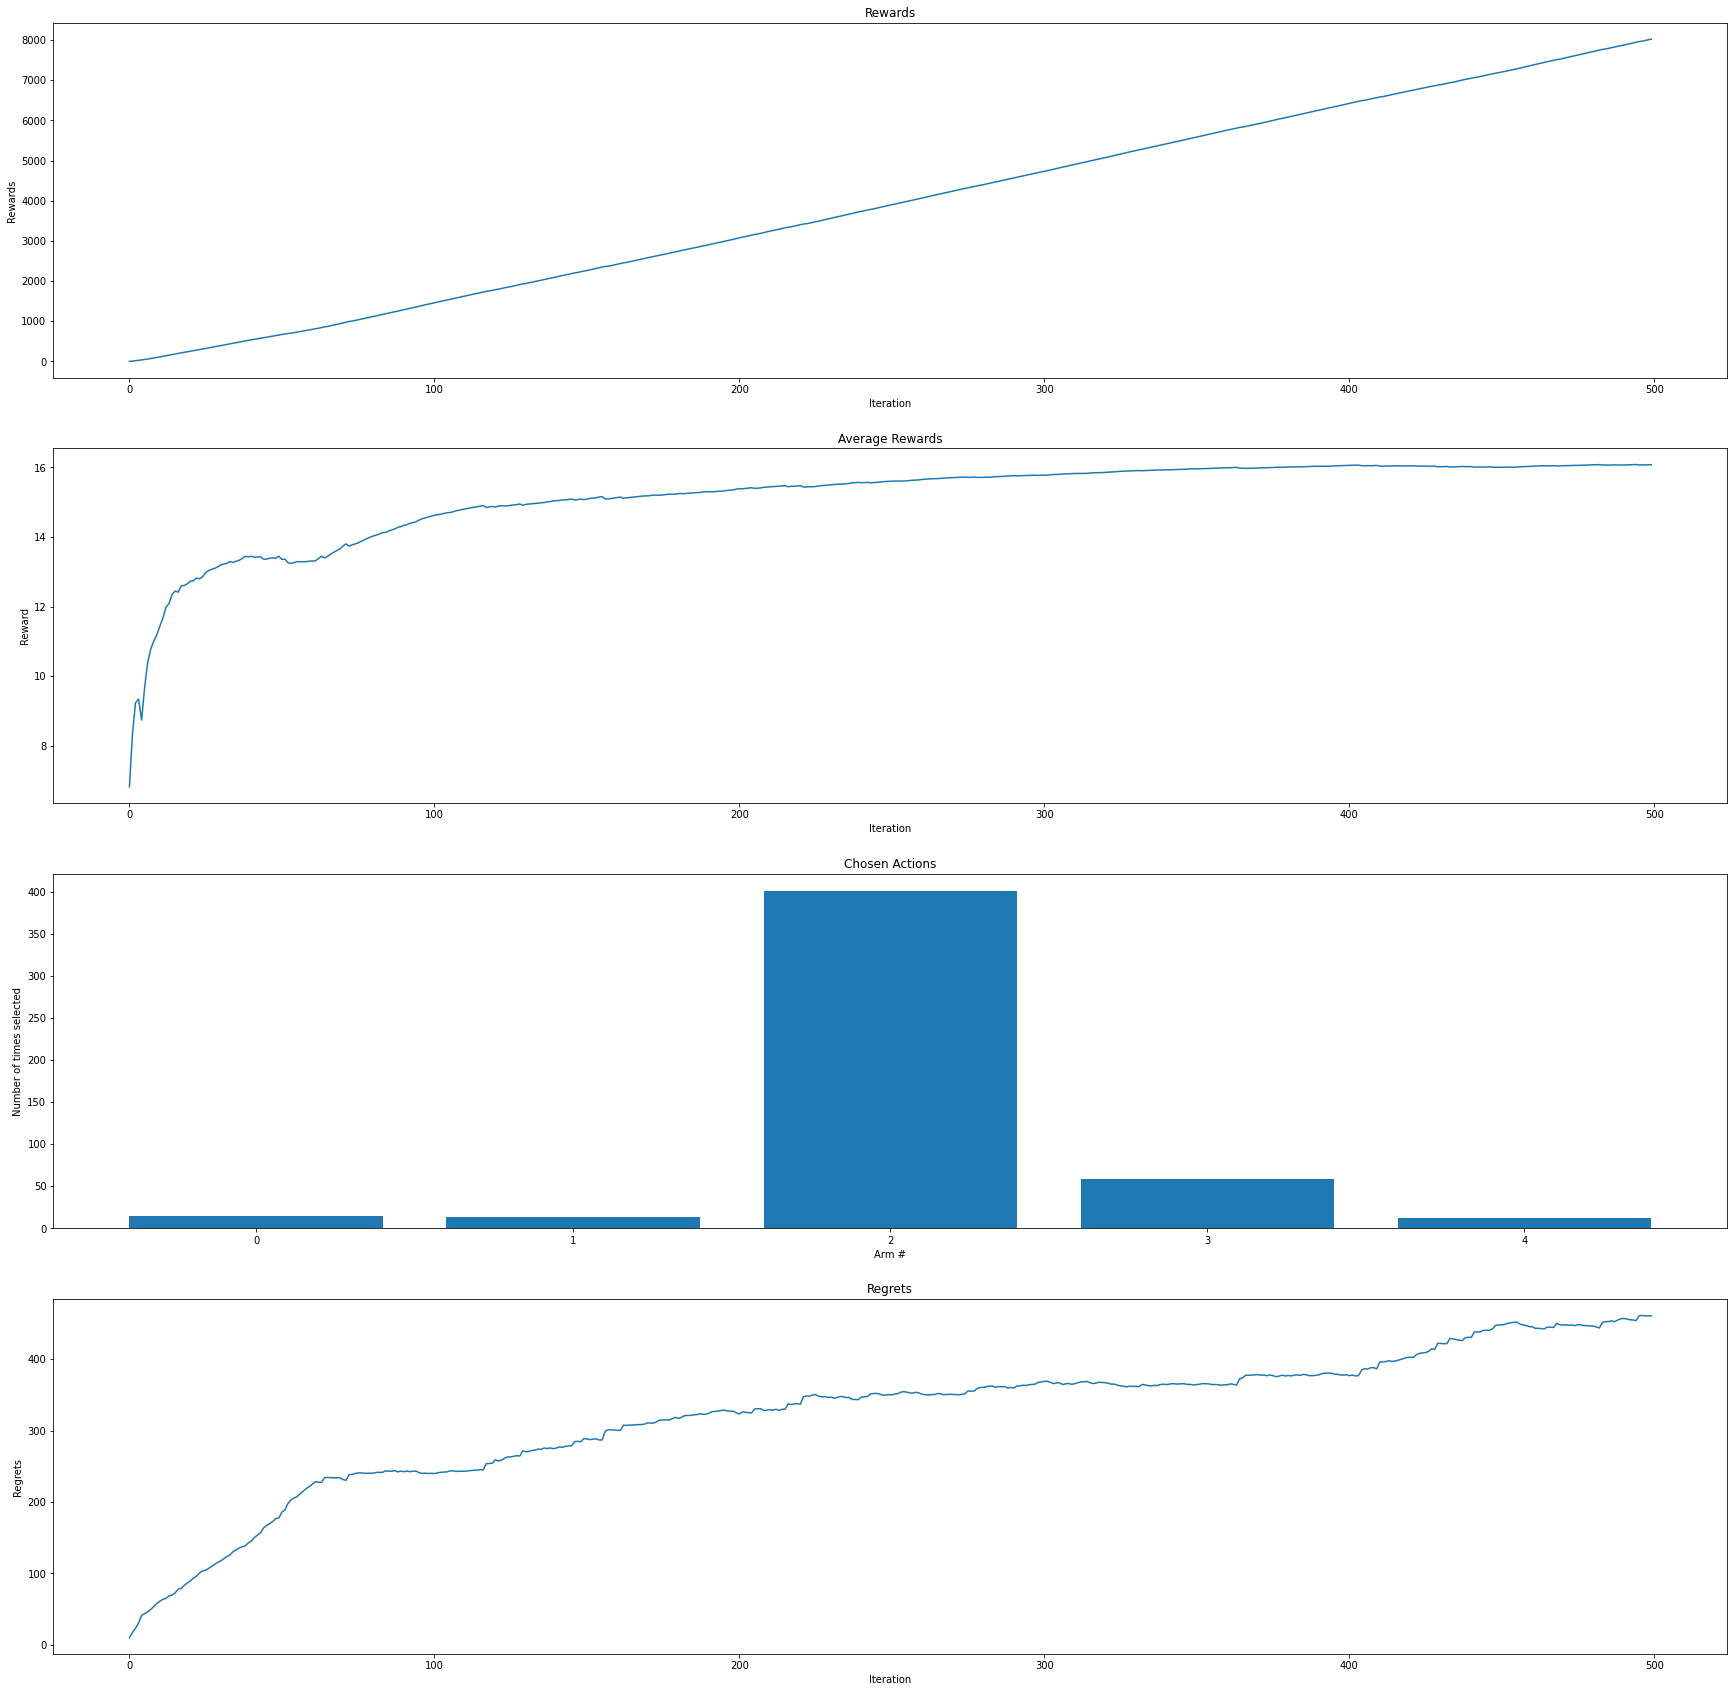

UCB AGENT
TOTAL REWARD : 8543.561349319
TIME TAKEN (ms) : 15.972


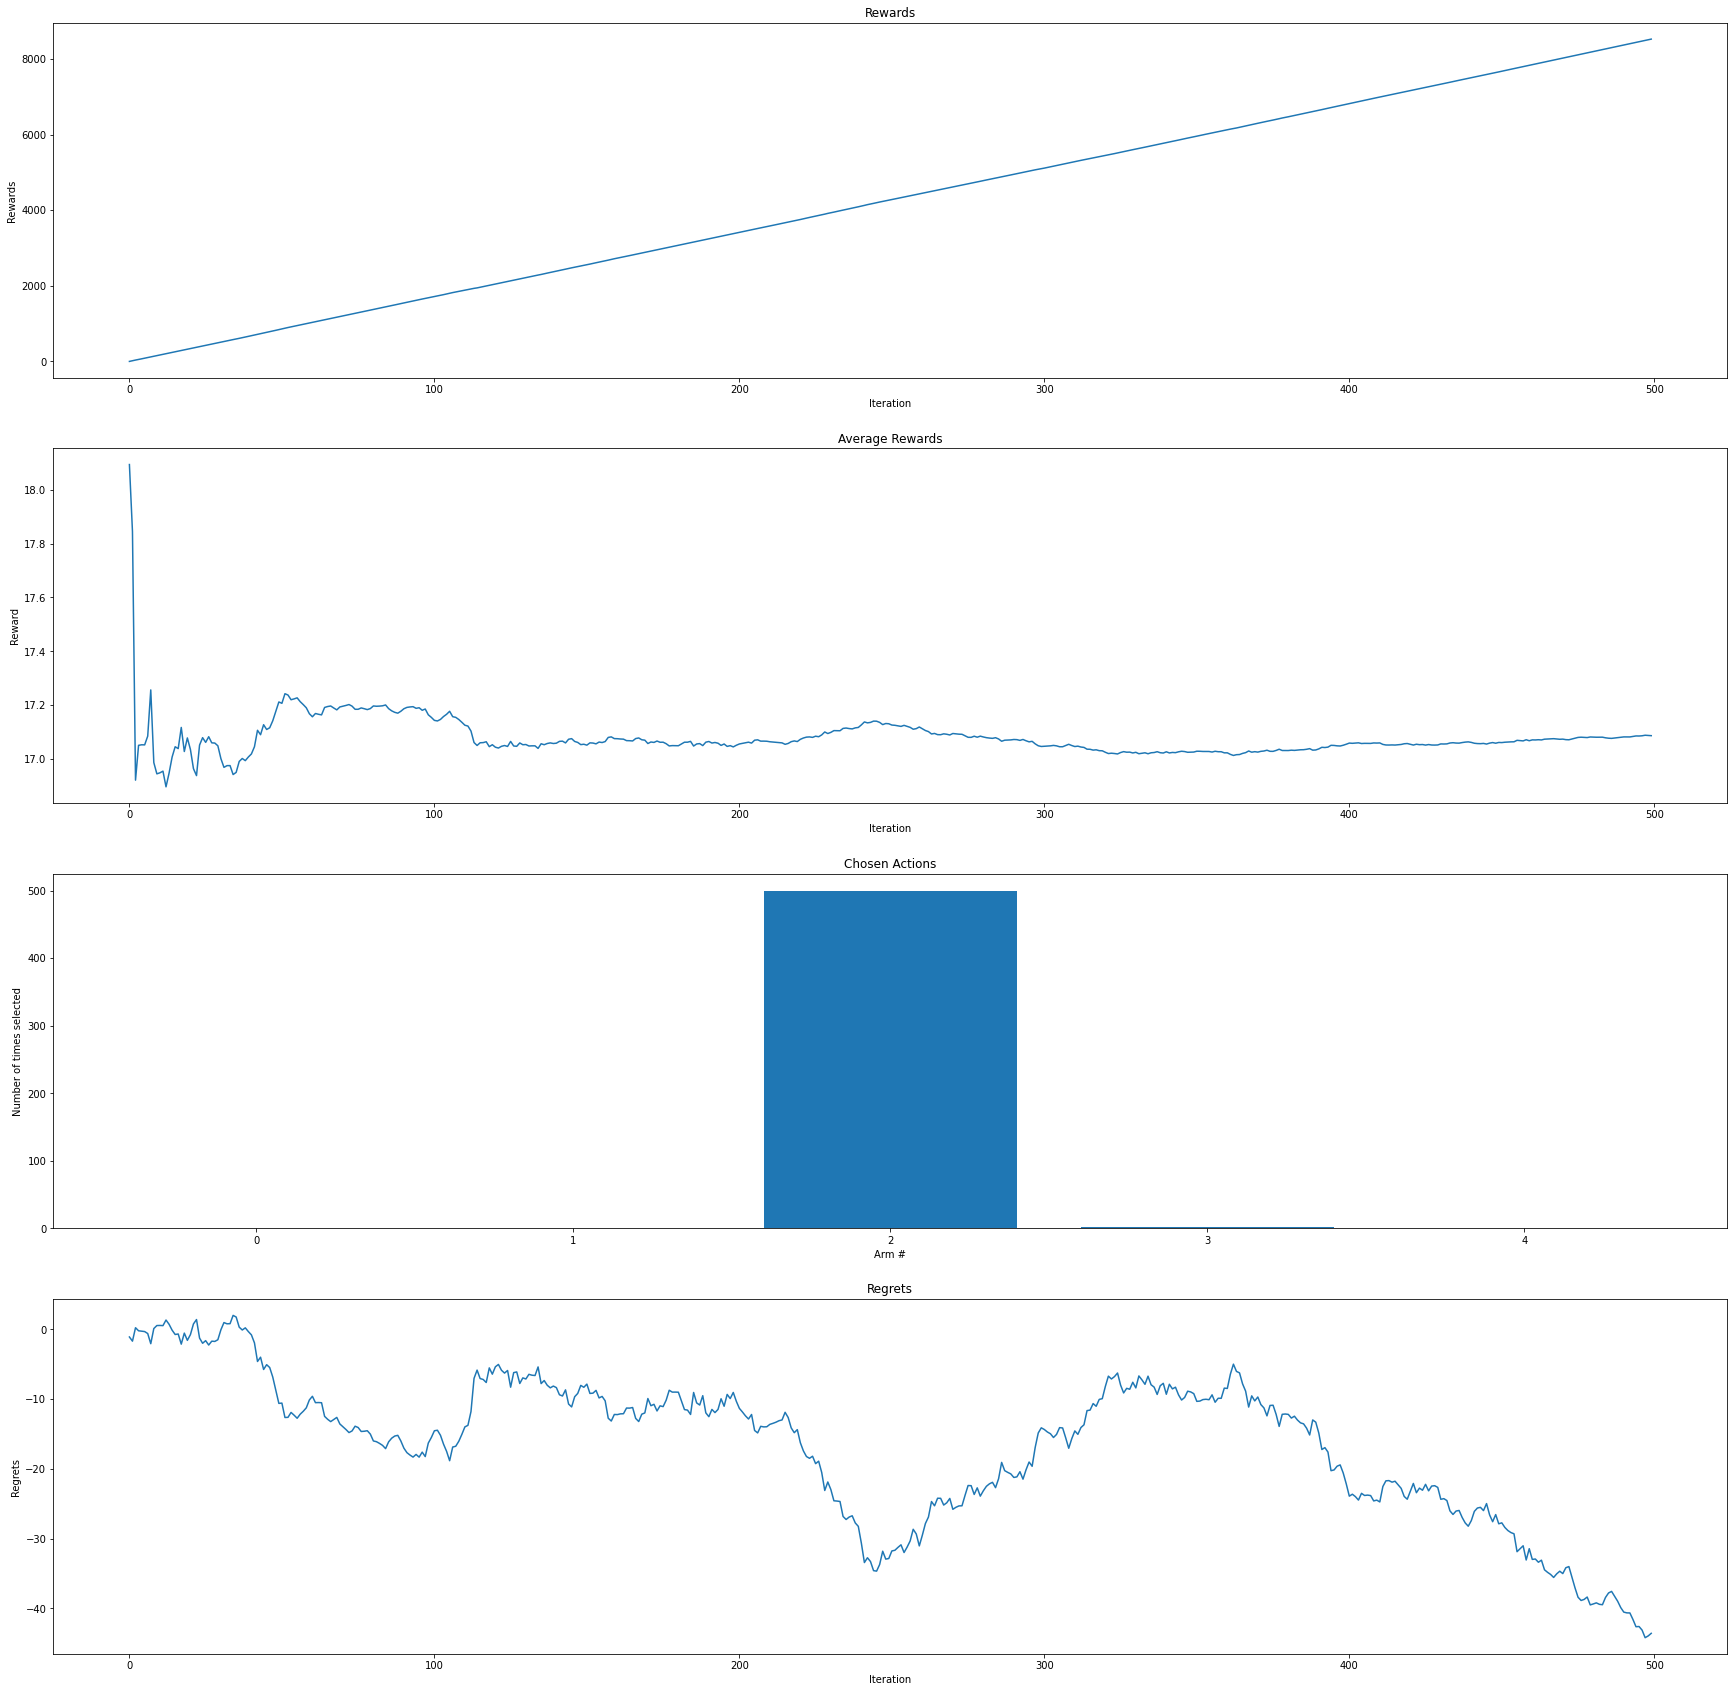

UCB_PC AGENT
TOTAL REWARD : 8462.569657038652
TIME TAKEN (ms) : 18.025


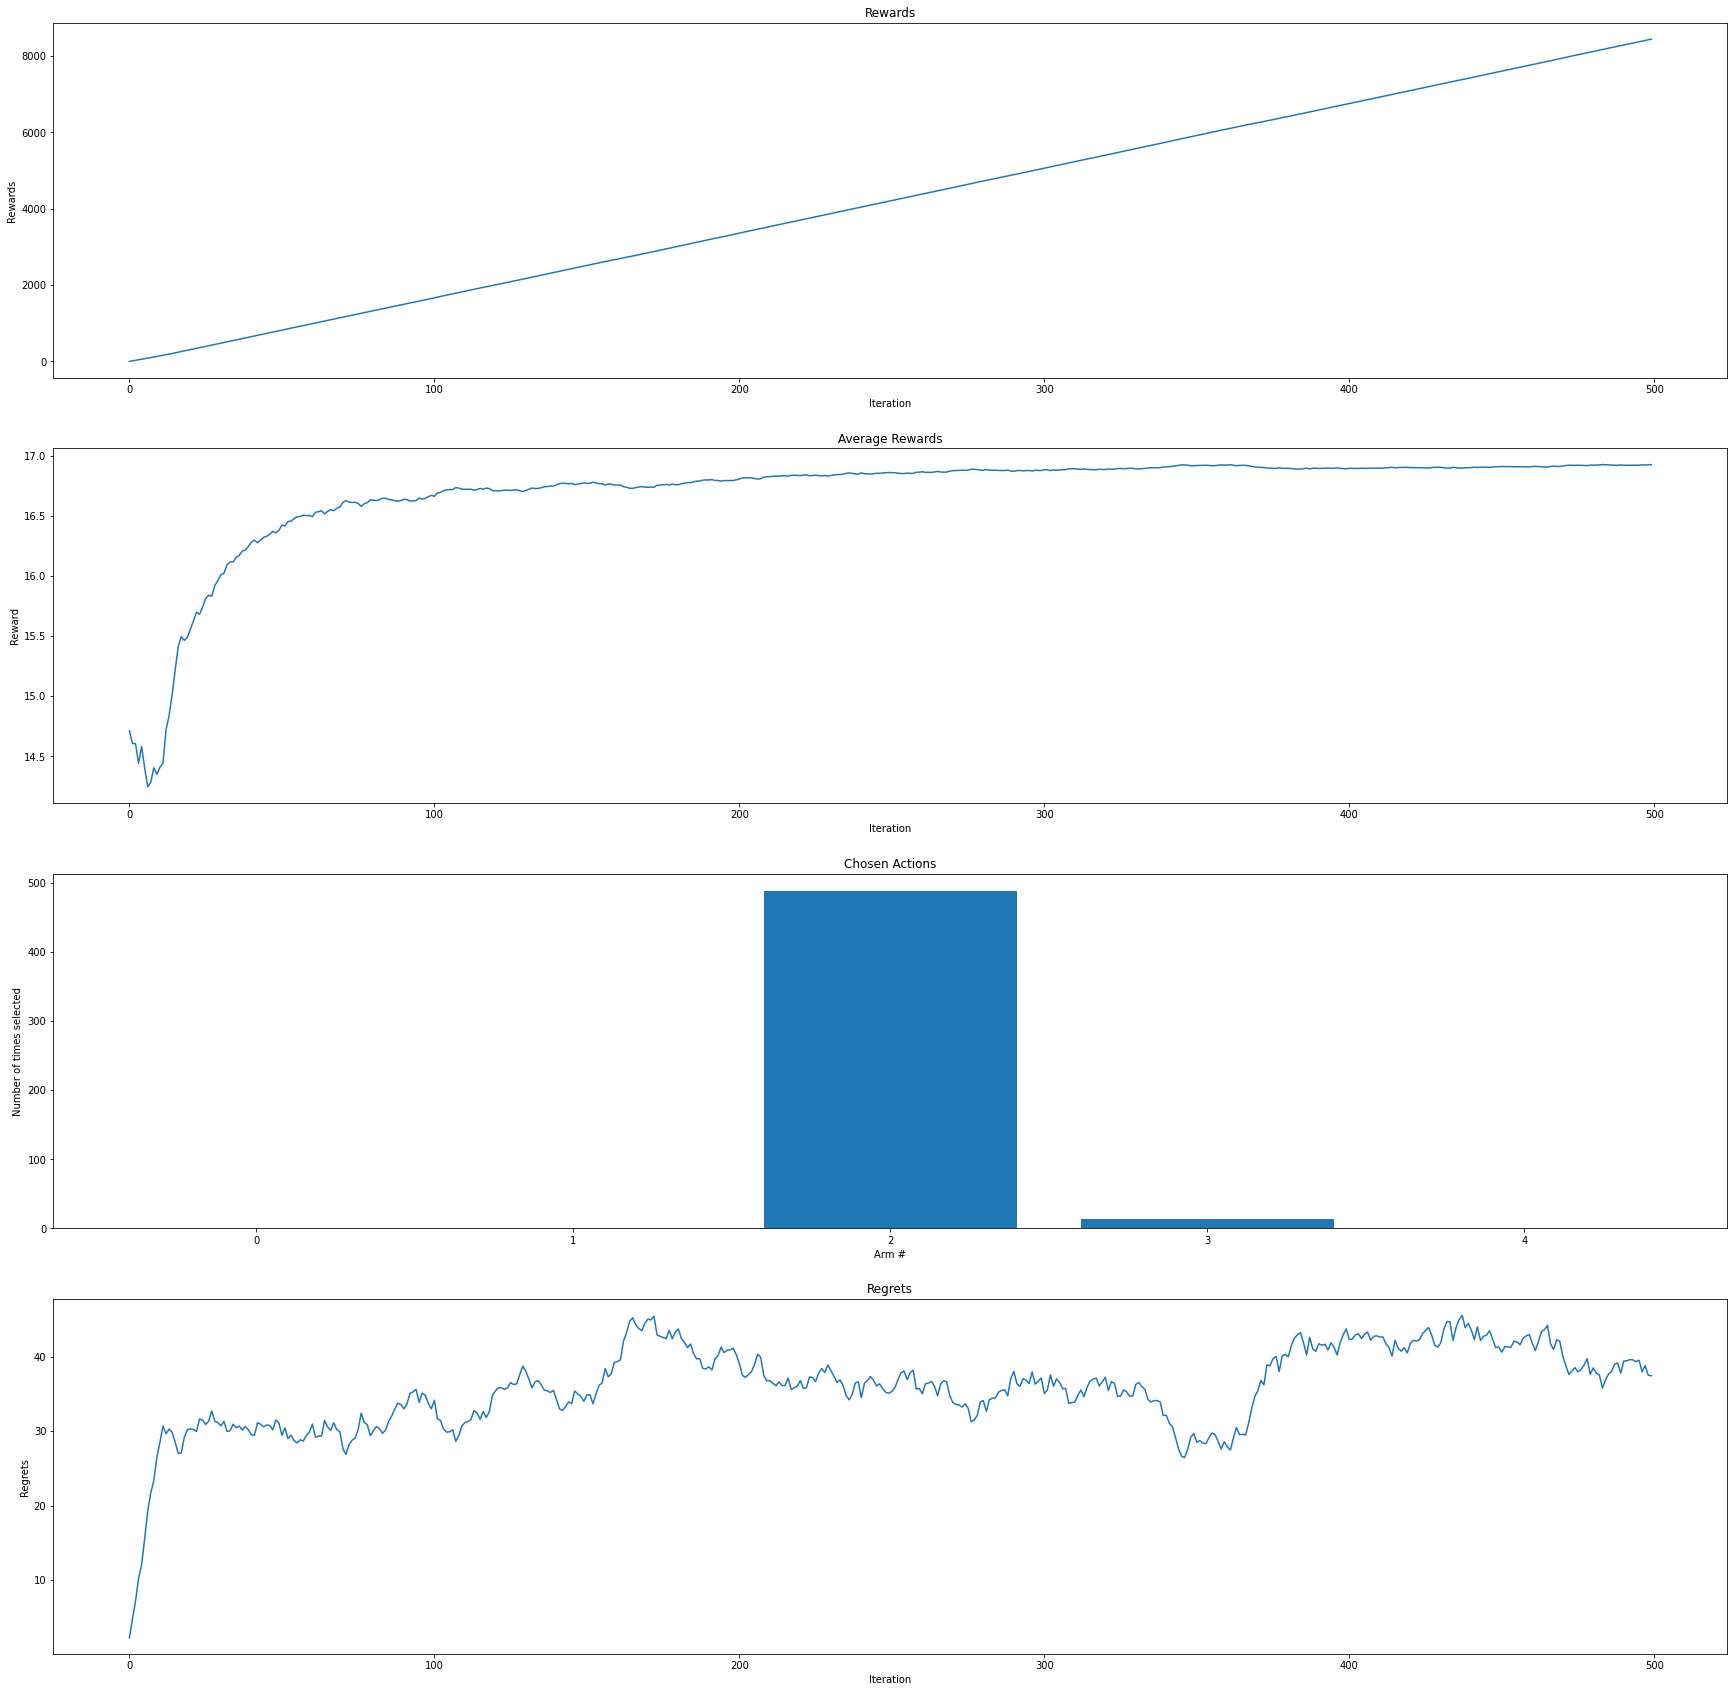

In [130]:
%run BanditLearning.ipynb

In [129]:
NUM_ARMS = 5
NUM_ITERATIONS = 500
environment = Env(rewards=np.random.randint(10, 20, NUM_ARMS), deviations=np.random.randint(1, 3, NUM_ARMS))

In [86]:
# Random Agent
def RA_run():
    random_agent = RandomAgent(env=environment, max_iterations=NUM_ITERATIONS)
    RA_history = random_agent.act()
    
    res = {"method": "RA", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(RA_history['rewards']), "time (ms)": RA_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(RA_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {RA_history['time']}")

    # plot_history(RA_history)

In [87]:
# Thompson Sampling
def TS_run():
    TS_history = TS_act(environment=environment, max_iterations=NUM_ITERATIONS)
    
    res = {"method": "TS", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(TS_history['rewards']), "time (ms)": TS_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(TS_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {TS_history['time']}")

    # plot_history(TS_history)

In [88]:
# Epsilon Greedy
def EG_run():
    epsilon_greedy_agent = EpsilonGreedyAgent(env=environment, max_iterations=NUM_ITERATIONS, epsilon=0.1)
    EG_history = epsilon_greedy_agent.act()
    
    res = {"method": "EG", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(EG_history['rewards']), "time (ms)": EG_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(EG_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {EG_history['time']}")

    # plot_history(EG_history)

In [89]:
# Upper Confidence Bound
def UCB_run():
    UCB_agent = UpperConfidenceBoundAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_history = UCB_agent.act()
    
    res = {"method": "UCB", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_history['rewards']), "time (ms)": UCB_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_history['time']}")

    # plot_history(UCB_history)

In [90]:
# UCB Pick and Compare
def UCB_PC_run():
    UCB_PC_agent = UCB_PickAndCompareAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_PC_history = UCB_PC_agent.act()
    
    res = {"method": "UCB_PC", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_PC_history['rewards']), "time (ms)": UCB_PC_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_PC_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_PC_history['time']}")

    # plot_history(UCB_PC_history)

In [91]:
results = pd.DataFrame()

In [92]:
results = results.append(RA_run(), ignore_index=True)
results = results.append(TS_run(), ignore_index=True)
results = results.append(EG_run(), ignore_index=True)
results = results.append(UCB_run(), ignore_index=True)
results = results.append(UCB_PC_run(), ignore_index=True)

In [95]:
results.head()

,method,iterations,arms (k),reward,time (ms)
0,RA,2000.0,5.0,57168.320293,60.024
1,TS,2000.0,5.0,93281.559964,67.001
2,EG,2000.0,5.0,89385.718589,41.972
3,UCB,2000.0,5.0,93828.700919,62.967
4,UCB_PC,2000.0,5.0,93900.499296,69.966


In [ ]:
arm_arr = [1, 10, 100, 1000, 5000, 10000]
iter_arr = [100, 500, 1000, 2000, 5000, 10000]

for i in range(len(arm_arr)):
    for j in range(len(iter_arr)):
        NUM_ARMS = arm_arr[i]
        NUM_ITERATIONS = iter_arr[j]
        
        environment = Env(rewards=np.random.randint(1, 50, NUM_ARMS), deviations=np.random.randint(1, 10, NUM_ARMS))
        
        print(len(environment.rewards))
        results = results.append(RA_run(), ignore_index=True)
        results = results.append(TS_run(), ignore_index=True)
        results = results.append(EG_run(), ignore_index=True)
        results = results.append(UCB_run(), ignore_index=True)
        results = results.append(UCB_PC_run(), ignore_index=True)

# test = {"bruh": [1,2,3], "bruh2": 2}
# results = results.append(test, ignore_index=True)

In [ ]:
results.head()

In [ ]:
results.to_csv('bandit_data.csv')